### Standard Imports

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

### Custom Imports

In [2]:
# download from http://roybatty.org/statplots.py 
# and upload to your Jupyter instance if you haven't done so already
import statplots 

# Hypothesis Testing

See lecture slides for intro discussion on hypothesis testing.

## Example: Morphological measurements of brushtail possums

I've posted a data set at the following URL -- http://roybatty.org/possum.txt --
that contains morphological measurements on 104 brushtail possums (*Trichosurus
vulpecula*). This data set contains information on variables such as sex, age,
head length, skull width, etc.

<p><a href="https://commons.wikimedia.org/wiki/File:Trichosurus-
vulpecula.jpg#/media/File:Trichosurus-vulpecula.jpg"><img
src="https://upload.wikimedia.org/wikipedia/commons/d/dd/Trichosurus-
vulpecula.jpg" alt="Trichosurus-vulpecula.jpg" height="290"
width="436"></a><br>By <a rel="nofollow" class="external text"
href="http://flickr.com/photos/15789734@N00">Bryce McQuillan</a> - originally
posted to <a href="//commons.wikimedia.org/wiki/Flickr" title="Flickr"
class="mw-redirect">Flickr</a> as <a rel="nofollow" class="external text"
href="http://flickr.com/photos/15789734@N00/2343066504">Brushtail Opossum
Trichosurus vulpecula</a>, <a href="http://creativecommons.org/licenses/by-
sa/2.0" title="Creative Commons Attribution-Share Alike 2.0">CC BY-SA 2.0</a>,
https://commons.wikimedia.org/w/index.php?curid=4195284</p>

### Possum tail length

Previous studies of brushtail possums in Australia have established that the
mean tail length of adult possums is 37.86cm.  I am studying an isolated
population of possums in the state of Victoria, and I am interested in whether
mean tail length of Victorian possums is shorter than that of possums in the
rest of Australia.


### Null and Alternative Hypotheses

* $H_0$: The average tail length of Victoria possums is the same as those in the
rest of Australia ($\mu = 37.86$)
* $H_A$: The average tail length of Victoria possums is less than the rest of
Australia ($\mu < 37.86$)

Since I have an a priori reason to believe the difference in tail length is
shorter, this is a "one-tailed" hypothesis test (pun intended!).

### Download and examine the data

In [3]:
possums = pd.read_table("http://roybatty.org/possum.txt")
possums.rename(columns={'pop':'popn'}, inplace=True)
possums.columns

Index(['site', 'popn', 'sex', 'age', 'headL', 'skullW', 'totalL', 'tailL'], dtype='object')

In [4]:
vic = vic = possums[possums.popn == 'Vic']
print(vic.tailL.describe())

count    46.000000
mean     35.934783
std       1.717908
min      32.000000
25%      35.000000
50%      36.000000
75%      36.875000
max      39.500000
Name: tailL, dtype: float64


### Assessing approximate normality

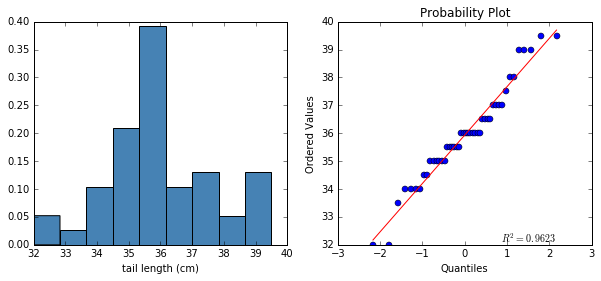

In [5]:
fig, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,4)
ax1.hist(vic.tailL, bins=9, color='steelblue', normed=True)
ax1.set_xlabel("tail length (cm)")
stats.probplot(vic.tailL, plot=ax2)
pass

### Calculating CIs

In [6]:
mean_tl = vic.tailL.mean()
std_tl = vic.tailL.std()
SE_tl = std_tl/np.sqrt(vic.tailL.count())
tl_ci95 = mean_tl - 1.96 * SE_tl, mean_tl + 1.96 * SE_tl

print("sample mean tail length = {:.2f}".format(mean_tl))
print("SE of mean tail length = {:.2f}".format(SE_tl))
print("95% CI for mean = ({:.2f}, {:.2f})".format(tl_ci95[0], tl_ci95[1]))

sample mean tail length = 35.93
SE of mean tail length = 0.25
95% CI for mean = (35.44, 36.43)


### Testing hypothesis using CI

We can then ask, does the mean under the null hypothesis fall within our 95% CI?  If not, than that provides evidence to reject the null hypothesis.

Let's illustrate the situation for the possum tail 95% CI with a figure.

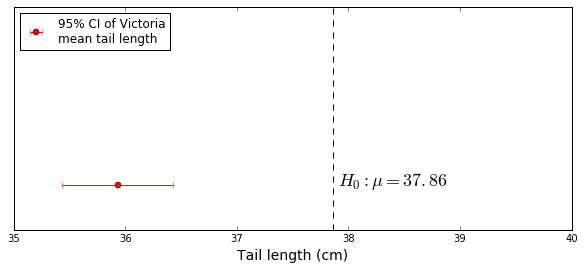

In [7]:
fig = plt.figure()
fig.set_size_inches(10,4)

mean_null = 37.86
plt.plot([],[])  # draw an empty plot to setup axes

# draw line at x-value corresponding to H0
plt.vlines(mean_null, 0, 1, linestyle='dashed', color='k')
plt.text(mean_null+0.05, 0.2, "$H_0: \mu = {:.2f}$".format(mean_null),
         fontsize=18)

plt.errorbar(mean_tl, 0.2, xerr=1.96 * SE_tl, fmt='ro', 
             label='95% CI of Victoria\nmean tail length')
plt.legend(numpoints=1, loc='upper left')

plt.yticks([]) # get ride of y-ticks
plt.xlabel("Tail length (cm)", fontsize=14)
plt.xlim(35, 40)

pass

# P-values

The CI approach above let us assess, in a general way, whether there's evidence to reject the null hypothesis. In the above example, we might state our finding something along the lines of "We are 95% confident that the mean tail length of Victoria possums is between 35.44 and 36.43mm. We therefore reject the null hypothesis that Victoria possums have the same mean tail length as other Australian possums." We would make the same statement for any other estimated 95% CI that did not overlap 37.86.  Thus the CI approach doesn't really tell us anything about the strength of evidence against the null hypothesis, it just gives us a basis by which to reject it (or fail to reject it).

### Strength of evidence against the null hypothesis

To assess the strength of the evidence against the null hypothesis, we can ask "what is the probability of observing data (or a statistic of interest) **at least as favorable** to the alternative hypothesis, **if the null hypothesis were true**?"

When considering a statistic of interest the usual way to phrase this question is with respect to the expected *sampling distribution of the statistic of interest* under the null hypothesis. For example, when testing a hypothesis involving means, we would ask "What is the probability of observing my sample mean, with respect to the expected distribution of sample means, if the null hypothesis was true."


### Calculating the P-value for the Possum tail example

Let's apply this to our possum tail example.  Our null hypothesis, $H_0$, is that the mean tail length in Victoria possums should be the same as the rest of Australia ($\mu=37.86$). Let's assume the standard deviation of tail length under the null and alternative hypothesis is the same, so that we can estimate the sampling distribution of the mean under the null hypothesis by using our sample standard deviation.

First we calculate the expected distribution of the sample means under the null hypothesis and plot this estimate.

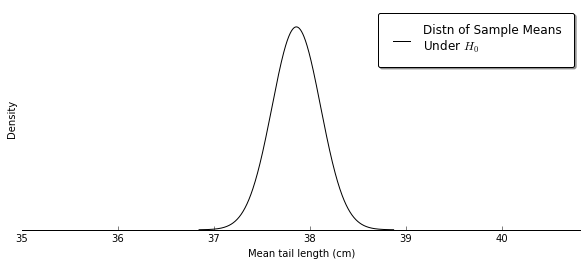

In [8]:
mean_null = 37.86
se_null = SE_tl  # because we assumed H0 and HA have same SE

fig = plt.figure()
fig.set_size_inches(10,4)
null_distn, ax = statplots.norm_plot(mean_null, se_null, nstds=4, color='k', 
                       label='Distn of Sample Means\nUnder $H_0$')

plt.xlabel("Mean tail length (cm)")
# make a fancy legend box
plt.legend(loc='upper right', fancybox=True, shadow=True, borderpad=1)
pass

Now let's modify this figure to draw the observed sample mean relative to the expected distribution of sample means under $H_0$. 

Most of the following code is involved in generating a nice plot, not carrying out any statistical calculations.  One thing to note is that I've written the `statplots.norm_plot` function so that it returns the "frozen" `scipy.stats.norm` distribution that corresponds to the plot you asked it to generate. This is convenient because you can then carry out subsequent calculations with this distribution.

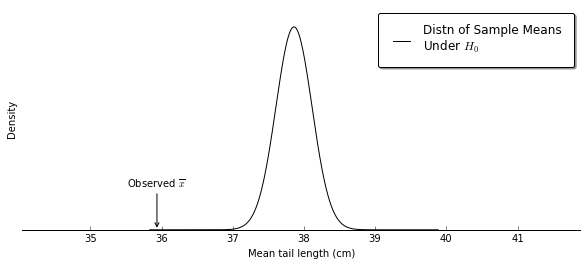

In [9]:
fig = plt.figure()
fig.set_size_inches(10,4)

distn, ax = statplots.norm_plot(mean_null, SE_tl, nstds=8, color='k', 
                       label='Distn of Sample Means\nUnder $H_0$')

ax.annotate("Observed $\overline{x}$", xy=(mean_tl,0),
             xytext=(0,40),
             textcoords='offset points',
             horizontalalignment="center",
             verticalalignment="bottom",
             arrowprops=dict(arrowstyle="->",color='black'))

plt.xlabel("Mean tail length (cm)")
plt.legend(fancybox=True, shadow=True, borderpad=1)
pass

It looks like our observed mean is very far to the left of the expected distribution of the samples mean for the given null hypothesis.  Let's express that as a Z-score. Recall that Z-scores are defined in terms of the number of standard deviations an observation sits from the mean $\frac{x - \mu}{\sigma}$.  In the present example, $x = \overline{x}$, $\mu = \mu_{H_0}$, and $\sigma = {SE}_{H_0}$.

In [10]:
z = (mean_tl - mean_null)/se_null
z

-7.6007911986606871

Our calculation confirms our graphical intuition. Our observed sample mean is 7.6 standard errors to the left of the the mean under the null hypothesis!

Finally, let's calculate the probability of observing a value this extreme under the null hypothesis. Since this is a one-sided hypothesis test, with our alternative hypothesis to the left of the null hypotehsis, we only have to the sum probability to the left of our observed value of the mean.

In [11]:
# probability to the left of observed mean(x) under H0
pval = stats.norm.cdf(z)  # since Z score we can use the std normal to compute
print("p-value =", pval)

p-value = 1.47162836164e-14


That is a vanishingly small probability, so we consider this strong evidence to reject the null-hypothesis.

## A two-sided hypothesis test

Let's test another hypothesis, this time a two-side one. We wish to test the hypothesis that the mean total body length of Victoria possums is not equal to the mean total length of other Australian possums, which previous studies have shown to be 86.8 cm$

### Null and Alternative Hypotheses

* $H_0$: The average body length of Victoria possums is the same as those in the
rest of Australia ($\mu = 86.8$)
* $H_A$: The average body length of Victoria possums is differnt than the rest of
Australia ($\mu \neq 86.8$)


### Assessing approximate normality

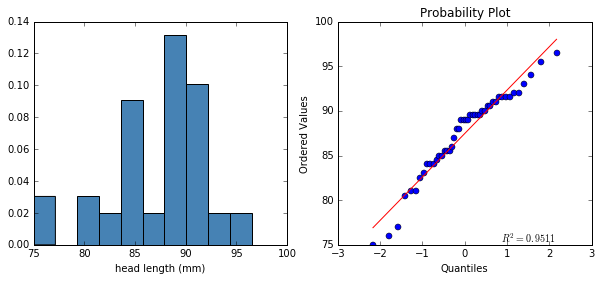

In [12]:
fig, (ax1, ax2) =  plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10,4)
ax1.hist(vic.totalL, bins=10, color='steelblue', normed=True)
ax1.set_xlabel("head length (mm)")
stats.probplot(vic.totalL, plot=ax2)
pass

Our histogram and probability plot raise some questions about the assumption of approximately normality.  However we have a decently large sample size ($n = 46$) and we're testing hypotheses about the equality of the mean (which tends to be fairly robust to departures from normality), so we decide to proceed (cautiously) under the normal assumption.

In [13]:
vic.totalL.describe()

count    46.000000
mean     87.467391
std       4.845848
min      75.000000
25%      84.625000
50%      89.000000
75%      90.875000
max      96.500000
Name: totalL, dtype: float64

### Confidence interval

In [14]:
mean_totL = vic.totalL.mean()
std_totL = vic.totalL.std()
se_totL = std_totL/np.sqrt(vic.totalL.count())

totL_ci95 = mean_totL - 1.96 * se_totL, mean_totL + 1.96 * se_totL

print("sample mean total length = {:.3f}".format(mean_totL))
print("SE of mean total length = {:.2f}".format(se_totL))
print("95% CI for mean = ({:.2f}, {:.2f})".format(totL_ci95[0], totL_ci95[1]))

sample mean total length = 87.467
SE of mean total length = 0.71
95% CI for mean = (86.07, 88.87)


### Illustration of 95% CI relative to H0

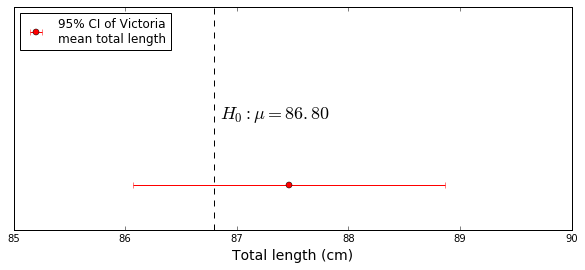

In [15]:
fig = plt.figure()
fig.set_size_inches(10,4)

mean_null = 86.8
plt.plot([],[])  # draw an empty plot to setup axes

# draw line at x-value corresponding to H0
plt.vlines(mean_null, 0, 1, linestyle='dashed', color='k')
plt.text(mean_null+0.05, 0.5, "$H_0: \mu = {:.2f}$".format(mean_null),
         fontsize=18)

plt.errorbar(mean_totL, 0.2, xerr=1.96 * se_totL, fmt='ro', 
             label='95% CI of Victoria\nmean total length')
plt.legend(numpoints=1, loc='upper left')

plt.yticks([]) # get ride of y-ticks
plt.xlabel("Total length (cm)", fontsize=14)
plt.xlim(85, 90)

pass

### Distribution of sample means under H0

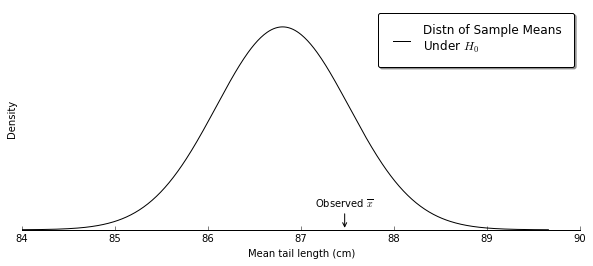

In [16]:
se_null = se_totL  # because we assumed H0 and HA have same SE

fig = plt.figure()
fig.set_size_inches(10,4)
null_distn, ax = statplots.norm_plot(mean_null, se_null, nstds=4, color='k', 
                       label='Distn of Sample Means\nUnder $H_0$')

ax.annotate("Observed $\overline{x}$", xy=(mean_totL,0),
             xytext=(0,20),
             textcoords='offset points',
             horizontalalignment="center",
             verticalalignment="bottom",
             arrowprops=dict(arrowstyle="->",color='black'))

plt.xlabel("Mean tail length (cm)")
# make a fancy legend box
plt.legend(loc='upper right', fancybox=True, shadow=True, borderpad=1)
plt.xlim(84,90)
pass

### Z-score for observed mean relative to distn of samples means under H0

In [17]:
z = (mean_totL - mean_null)/se_null
z

0.93409197172276648

### Figure illustrating region of PDF at least as extreme as observed mean

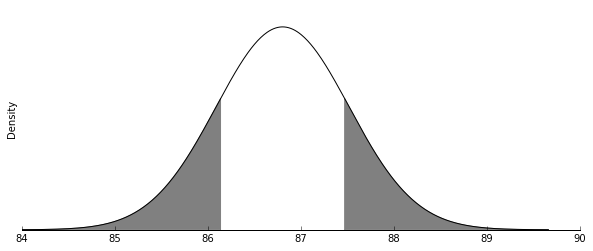

In [18]:
fig = plt.figure()
fig.set_size_inches(10,4)
 
distn,ax = statplots.norm_plot(mean_null, se_null, nstds=4, color='k', 
                       label='Distn of Sample Means\nUnder $H_0$')

# left tail
statplots.area_under_distn(distn, mean_null - 4*se_null, mean_null - z*se_null, color='gray')

# right tail
statplots.area_under_distn(distn, mean_null + 4*se_null, mean_null + z*se_null, color='gray')

plt.xlim(84,90)
pass

In [20]:
### p-value of two-tail hypothesis test

In [19]:
pleft = stats.norm.cdf(-z)  # left tail = cdf
pright = stats.norm.sf(z)  # right tail = sf
pval = pleft + pright
print("p-value =", pval)

p-value = 0.350256452847
